In [ ]:
!git clone https://github.com/PeizeSun/OneNet.git

Cloning into 'OneNet'...
remote: Enumerating objects: 677, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 677 (delta 48), reused 48 (delta 48), pack-reused 625
Receiving objects: 100% (677/677), 1.53 MiB | 4.38 MiB/s, done.
Resolving deltas: 100% (185/185), done.


In [ ]:
cd OneNet


/content/OneNet


In [ ]:
!nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html


Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 735.4 MB 16 kB/s 
     |████████████████████████████████| 12.8 MB 12.4 MB/s 
     |████████████████████████████████| 7.6 MB 4.1 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0+cu113
    Uninstalling torch-1.11.0+cu113:
      Successfully uninstalled torch-1.11.0+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.12.0+cu113
    Uninstalling torchvision-0.12.0+cu113:
      Successfully uninstalled torchvision-0.12.0+cu113
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.11.0+cu113
    Uninstalling torchaudio-0.11.0+cu113:
      Successfully uninstalled torchaudio-0.11.0+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.12.0 requires torch

In [ ]:
!python setup.py build develop


running build
running build_py
creating build
creating build/lib.linux-x86_64-3.7
creating build/lib.linux-x86_64-3.7/detectron2
copying detectron2/__init__.py -> build/lib.linux-x86_64-3.7/detectron2
creating build/lib.linux-x86_64-3.7/detectron2/config
copying detectron2/config/defaults.py -> build/lib.linux-x86_64-3.7/detectron2/config
copying detectron2/config/__init__.py -> build/lib.linux-x86_64-3.7/detectron2/config
copying detectron2/config/config.py -> build/lib.linux-x86_64-3.7/detectron2/config
copying detectron2/config/compat.py -> build/lib.linux-x86_64-3.7/detectron2/config
creating build/lib.linux-x86_64-3.7/detectron2/export
copying detectron2/export/torchscript_patch.py -> build/lib.linux-x86_64-3.7/detectron2/export
copying detectron2/export/shared.py -> build/lib.linux-x86_64-3.7/detectron2/export
copying detectron2/export/caffe2_export.py -> build/lib.linux-x86_64-3.7/detectron2/export
copying detectron2/export/caffe2_inference.py -> build/lib.linux-x86_64-3.7/detec

In [ ]:
!pip install pyyaml==5.1 pycocotools>=2.0.1

In [ ]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.7.1+cu101 True


In [ ]:
!mkdir -p datasets/coco



!ln -s /path_to_coco_dataset/annotations datasets/coco/annotations
!ln -s /path_to_coco_dataset/train2017 datasets/coco/train2017
!ln -s /path_to_coco_dataset/val2017 datasets/coco/val2017

In [ ]:
!wget http://images.cocodataset.org/zips/test2017.zip
!unzip test2017

Streaming output truncated to the last 5000 lines.
 extracting: test2017/000000251604.jpg  
 extracting: test2017/000000145034.jpg  
 extracting: test2017/000000234833.jpg  
 extracting: test2017/000000025927.jpg  
 extracting: test2017/000000393116.jpg  
 extracting: test2017/000000536478.jpg  
 extracting: test2017/000000365460.jpg  
 extracting: test2017/000000089887.jpg  
 extracting: test2017/000000274928.jpg  
 extracting: test2017/000000310028.jpg  
 extracting: test2017/000000229793.jpg  
 extracting: test2017/000000394339.jpg  
 extracting: test2017/000000564538.jpg  
 extracting: test2017/000000440585.jpg  
 extracting: test2017/000000541512.jpg  
 extracting: test2017/000000395525.jpg  
 extracting: test2017/000000235435.jpg  
 extracting: test2017/000000069964.jpg  
 extracting: test2017/000000131962.jpg  
 extracting: test2017/000000281392.jpg  
 extracting: test2017/000000534893.jpg  
 extracting: test2017/000000128676.jpg  
 extracting: test2017/000000187639.jpg  
 extra

In [ ]:
!python projects/OneNet/train_net.py --num-gpus 1 \
    --config-file projects/OneNet/configs/onenet.res18.dcn.yaml \
    --eval-only MODEL.WEIGHTS /content/OneNet/configs/onenet_r18dcn.pth

Command Line Args: Namespace(config_file='projects/OneNet/configs/onenet.res18.dcn.yaml', dist_url='tcp://127.0.0.1:49152', eval_only=True, machine_rank=0, num_gpus=1, num_machines=1, opts=['MODEL.WEIGHTS', '/content/OneNet/configs/onenet_r18dcn.pth'], resume=False)
[04/27 05:18:26 detectron2]: Rank of current process: 0. World size: 1
[04/27 05:18:27 detectron2]: Environment info:
----------------------  ---------------------------------------------------------------
sys.platform            linux
Python                  3.7.13 (default, Apr 24 2022, 01:04:09) [GCC 7.5.0]
numpy                   1.21.6
detectron2              0.3 @/content/OneNet/detectron2
Compiler                GCC 7.5
CUDA compiler           CUDA 11.1
detectron2 arch flags   3.7
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.7.1+cu101 @/usr/local/lib/python3.7/dist-packages/torch
PyTorch debug build     False
GPU available           True
GPU 0                   Tesla K80 (arch=3.7)
CUDA_HOME           

In [ ]:
!python demo/demo.py\
    --config-file projects/OneNet/configs/onenet.res18.dcn.yaml \
    --input /content/OneNet/test2017/000000000188.jpg --output /content/OneNet/output_image --confidence-threshold 0.4 \
    --opts MODEL.WEIGHTS /content/OneNet/configs/onenet_r18dcn.pth

[04/27 05:28:43 detectron2]: Arguments: Namespace(confidence_threshold=0.4, config_file='projects/OneNet/configs/onenet.res18.dcn.yaml', input=['/content/OneNet/test2017/000000000188.jpg'], opts=['MODEL.WEIGHTS', '/content/OneNet/configs/onenet_r18dcn.pth'], output='/content/OneNet/output_image', video_input=None, webcam=False)
[04/27 05:28:45 fvcore.common.checkpoint]: [Checkpointer] Loading from /content/OneNet/configs/onenet_r18dcn.pth ...
  0% 0/1 [00:00<?, ?it/s][04/27 05:28:46 detectron2]: /content/OneNet/test2017/000000000188.jpg: detected 2 instances in 0.13s
100% 1/1 [00:00<00:00,  2.15it/s]


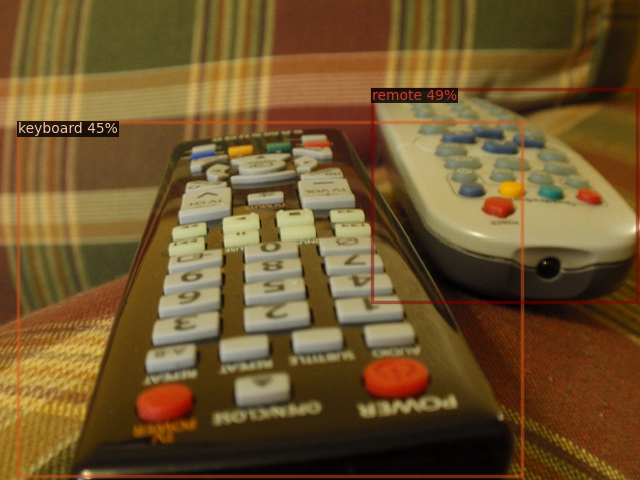

In [ ]:
from IPython.display import Image
Image('/content/OneNet/output_image.png')